In [1]:
!pip install imbalanced-learn
!pip install imblearn
!pip install xgboost
!pip install lightgbm

# Imbalanced Classification

## 1. What is Imbalanced Classification

Imbalanced classification adalah kondisi ketika jumlah sampel antar kelas tidak seimbang. Kelas mayoritas biasanya jauh lebih besar dibanding kelas minoritas sehingga model lebih mudah belajar dari kelas yang dominan. Kondisi ini umum terjadi pada kasus fraud detection, churn prediction, medical diagnosis, dan anomaly detection.

Contohnya pada dataset fraud:

|                | Predicted Non-Fraud | Predicted Fraud |
|---------------|----------------------|-----------------|
| **Actual Non-Fraud** | 5030 | 101 |
| **Actual Fraud**     | 98   | 95  |

Rasio kelas dapat berada di rentang 2:1 sampai ekstrem seperti 99:1.

---

## 2. Methods to Handle Class Imbalance

Teknik penanganan imbalance dapat dilakukan pada level data maupun algoritma.

### a. Data-Based Method
Mengubah distribusi dataset.

- Undersampling (mengurangi kelas mayoritas)
- Oversampling (menambah kelas minoritas)

### b. Resampling Method
Teknik lanjutan untuk menghasilkan data sintetis pada kelas minoritas.

Contoh:
- SMOTE
- ADASYN
- Borderline-SMOTE

### c. Algorithm-Based Method
Mengatur model agar lebih sensitif terhadap kelas minoritas.

Contoh:
- Class weight balancing
- XGBoost (`scale_pos_weight`)
- RandomForest (balanced class weight)
- Gradient Boosting

---

## 3. How to Apply Imbalance Handling

Proses ini diintegrasikan pada tahap **Modeling** dan **Evaluation** dalam framework CRISP-DM. Metode imbalance harus digunakan sebelum model dilatih agar model belajar pola pada kedua kelas secara proporsional.

---

## 4. Metrics for Imbalanced Classification

Akurasi saja tidak cukup untuk dataset tidak seimbang, karena model dapat terlihat baik hanya dengan memprediksi kelas mayoritas.

Metrik evaluasi yang lebih relevan:

- Precision
- Recall
- F1-Score
- ROC-AUC
- Confusion Matrix
- Precision-Recall Curve

Pada konteks fraud detection, recall cenderung menjadi metrik utama karena kesalahan *false negative* menimbulkan kerugian yang lebih besar dibanding *false positive*.

---

## 5. Evaluation Method

Model biasanya dievaluasi menggunakan:

- Stratified cross validation
- Confusion matrix analysis
- ROC curve
- Precision-Recall curve

Pendekatan ini memastikan model tidak bias terhadap kelas mayoritas dan mampu mendeteksi kelas minoritas secara konsisten.

---

## Some Solutions for Imbalanced Dataset

Penanganan imbalanced dataset dapat dilakukan melalui beberapa pendekatan. Solusi ini dapat diterapkan sesuai kebutuhan model, karakteristik target, dan tingkat ketidakseimbangan data.

---

### 1. Data-Based Solutions

Pendekatan ini berfokus pada kualitas dan ketersediaan data.

- **Collect More Data**  
  Menambah jumlah data kelas minoritas apabila memungkinkan, terutama jika data berasal dari proses operasional yang masih berjalan.

- **Feature Engineering**  
  Membuat fitur baru yang lebih relevan agar pola pada kelas minoritas lebih mudah terdeteksi model.

---

### 2. Resampling Techniques

Metode ini memodifikasi distribusi kelas secara langsung, baik dengan mengurangi kelas mayoritas atau menambah kelas minoritas.

- **Undersampling**  
  Mengurangi jumlah sampel dari kelas mayoritas.

- **Oversampling**  
  Menambahkan jumlah sampel pada kelas minoritas dengan cara menduplikasi data asli.

- **Advanced Resampling Techniques**
  - CNN (Condensed Nearest Neighbor)  
  - NCR (Neighborhood Cleaning Rule)  
  - NearMiss  
  Metode ini biasanya menghilangkan data mayoritas yang noise sehingga dataset menjadi lebih representatif.

- **SMOTE (Synthetic Minority Oversampling Technique)**  
  Menghasilkan data sintetis berdasarkan interpolasi antar sampel pada kelas minoritas, bukan sekadar menduplikasi data.

---

### 3. Algorithm-Based Solutions

Solusi ini fokus pada algoritma pembelajaran agar lebih sensitif terhadap kelas minoritas.

- **Penalized Method**  
  Memberikan penalti lebih besar pada kesalahan prediksi kelas minoritas sehingga model belajar lebih serius terhadapnya.

- **Use Specific Algorithms**  
  Beberapa algoritma memiliki parameter atau mekanisme bawaan untuk menangani imbalance, seperti:
  - XGBoost (`scale_pos_weight`)
  - Random Forest dengan `class_weight="balanced"`
  - Logistic Regression dengan `penalty` dan `class_weight`

---

Pendekatan yang digunakan bisa satu metode atau kombinasi tergantung pada kondisi dataset dan tujuan modeling.


## Data

Kualitas model machine learning sangat bergantung pada kualitas data yang digunakan. Jika fitur yang ada sudah mampu memisahkan kelas secara jelas meskipun dataset tidak seimbang, maka metode balancing tambahan seperti resampling atau penyesuaian algoritma mungkin tidak diperlukan.

Beberapa langkah yang dapat dilakukan pada level data:

- **Collect More Data**  
  Menambah jumlah data baik pada level baris maupun kolom jika memungkinkan, terutama untuk kelas minoritas.

- **Feature Engineering**  
  Menciptakan fitur baru yang lebih informatif agar pola pada kelas minoritas dapat lebih mudah dipelajari oleh model.

Pendekatan ini dilakukan sebelum masuk ke teknik balancing lainnya, karena data dan fitur yang lebih representatif sering kali meningkatkan performa model tanpa perlu modifikasi distribusi kelas.


## Resampling

Resampling adalah teknik yang digunakan untuk membuat distribusi kelas menjadi lebih seimbang dalam dataset. Pendekatan ini membantu model agar tidak hanya belajar dari kelas mayoritas, tetapi juga memberikan perhatian pada kelas minoritas.

Tujuan utama resampling adalah menciptakan dataset dengan distribusi kelas yang relatif lebih proporsional.

---

### Metode Resampling

Terdapat dua pendekatan dasar dalam resampling:

- **Undersampling**
  Mengurangi jumlah sampel pada kelas mayoritas agar proporsinya mendekati kelas minoritas. Teknik ini cocok jika data mayoritas sangat besar dan representatif.

- **Oversampling**
  Menambah jumlah sampel pada kelas minoritas, baik dengan menduplikasi data atau menggunakan metode sintetik seperti SMOTE.

---

Resampling biasanya dilakukan sebelum proses training agar model menerima proporsi data yang lebih adil dan tidak bias terhadap kelas yang lebih dominan.


### Random Undersampling

Random undersampling adalah teknik balancing data dengan cara menghapus sebagian sampel dari kelas mayoritas secara acak sampai distribusi kelas menjadi lebih seimbang.

Pendekatan ini sederhana dan cepat untuk diterapkan, tetapi memiliki kemungkinan kehilangan informasi berharga karena sebagian data mayoritas dibuang.

---

#### Karakteristik:

- Mengurangi ukuran dataset
- Menghapus data dari kelas mayoritas secara acak
- Cocok jika dataset sangat besar dan kelas mayoritas mendominasi

---

#### Kelebihan:

- Prosesnya sederhana dan cepat
- Mengurangi waktu training karena data lebih sedikit

---

#### Kekurangan:

- Risiko kehilangan informasi penting dari kelas mayoritas
- Model bisa menjadi kurang general karena data berkurang signifikan


### Drawbacks of Resampling Techniques

Meskipun resampling membantu menyeimbangkan distribusi kelas, setiap metode memiliki kelemahan yang perlu dipertimbangkan sebelum digunakan.

---

| Method | Drawbacks |
|--------|-----------|
| **Random Undersampling** | - Sejumlah besar data dibuang<br>- Potensi hilangnya informasi penting<br>- Risiko penurunan performa model |
| **Random Oversampling** | - Terlalu banyak data yang diduplikasi<br>- Risiko overfitting karena model belajar pola dari data tiruan<br>- Generalisasi model menjadi lemah pada data baru |

---

Pemilihan metode sebaiknya mempertimbangkan ukuran dataset, tingkat imbalance, dan tujuan modeling.


### Undersampling Techniques

Undersampling adalah pendekatan untuk mengurangi jumlah sampel dari kelas mayoritas berdasarkan aturan tertentu, bukan secara acak seperti random undersampling.

Tujuannya adalah menjaga informasi yang masih relevan sekaligus membuang data mayoritas yang dianggap noise atau kurang berguna.

---

#### Teknik yang umum digunakan:

- **Condensed Nearest Neighbour (CNN)**  
  Menghapus data yang tidak diperlukan dari kelas mayoritas dengan mempertahankan hanya sampel yang benar–benar membantu membedakan kelas.

- **Neighbour Cleaning Rule (NCR)**  
  Membersihkan data yang dianggap mengganggu dengan memanfaatkan algoritma berbasis tetangga terdekat.

- **Near Miss**  
  Memilih sampel kelas mayoritas yang paling dekat secara jarak dengan kelas minoritas sehingga distribusi lebih representatif.

---

#### Tujuan Utama

Teknik ini berfokus untuk menghapus data borderline, outlier, atau noise di kelas mayoritas hingga tercapai distribusi kelas yang lebih seimbang tanpa menghilangkan informasi penting.


### Oversampling Technique

Oversampling adalah metode untuk menambah jumlah data pada kelas minoritas hingga distribusi kelas menjadi lebih seimbang. Alih‑alih menduplikasi data asli, metode ini dapat menghasilkan data sintetis yang menyerupai pola data minoritas.

---

#### Teknik Utama:

- **SMOTE (Synthetic Minority Oversampling Technique)**  
  SMOTE bekerja dengan membuat sampel sintetis berdasarkan jarak antar sampel minoritas (nearest neighbors), bukan sekadar copy‑paste data yang sudah ada.

---

#### Cara Kerja Singkat SMOTE:

1. Pilih satu data dari kelas minoritas.
2. Tentukan beberapa tetangga terdekat (k‑nearest neighbors).
3. Buat data sintetis dengan interpolasi antara data asli dan tetangganya.
4. Tambahkan data sintetis tersebut hingga distribusi kelas mendekati seimbang.

---

#### Kelebihan:

- Mengurangi risiko overfitting dibanding random oversampling.
- Data sintetis menambah variasi pada kelas minoritas.

---

#### Catatan:

Oversampling dilakukan sampai distribusi kelas lebih seimbang, tetapi tetap perlu diperhatikan agar tidak menambah noise atau menyebabkan model terlalu kompleks.

---


### Penalized Models

Penalized models merupakan pendekatan untuk memberi bobot lebih besar pada kelas minoritas sehingga model lebih fokus mempelajari pola kelas tersebut. Teknik ini biasanya lebih efisien dibandingkan metode resampling karena tidak mengubah jumlah sampel data.

---

#### Kenapa Digunakan?

- Membuat model lebih memperhatikan kelas minoritas.
- Lebih cepat dibandingkan resampling karena tidak perlu membuat atau membuang data.
- Cocok digunakan saat dataset sudah cukup besar atau ketika distribusi data masih dapat diatasi tanpa modifikasi jumlah sampel.

---

#### Implementasi di Scikit-Learn

Beberapa algoritma di scikit‑learn menyediakan parameter `class_weight` untuk menangani imbalance dataset.

Contoh model yang mendukung parameter ini:

- Logistic Regression  
- Decision Tree  
- Random Forest  
- Support Vector Machine (SVM)  

Parameter umum yang digunakan:

```python
class_weight="balanced"


## How to Handle Imbalance Problem Properly?

Untuk menangani imbalance data secara efektif, tidak hanya fokus pada teknik resampling atau pemilihan algoritma—tetapi juga penting memperhatikan cara evaluasi model.

Terdapat dua hal penting yang perlu diperhatikan:

- **Metrics**
- **Evaluation Method**


## Metrics Example Guidance

Pemilihan metrik evaluasi sangat penting dalam kasus **imbalanced classification**. Menggunakan metrik yang salah dapat menyebabkan model terlihat baik secara angka namun gagal mencapai tujuan bisnis yang sebenarnya.

Sebagai contoh:
- Model fraud detection dengan **accuracy 99%** mungkin terdengar bagus.
- Namun jika fraud hanya 1% dari data, model bisa saja **selalu memprediksi "bukan fraud"** dan tetap mendapatkan 99% akurasi.
- Di dunia nyata, model seperti ini **tidak berguna** karena tidak mendeteksi kasus penting (kelas minoritas).

Oleh karena itu, pemilihan metrik harus disesuaikan dengan **business objective** dan **konsekuensi kesalahan prediksi**.

---

### 📌 Panduan Memilih Metrik

Diagram pada slide menunjukkan alur pertanyaan untuk menentukan metrik yang tepat:

---

#### 1. Apa yang ingin dievaluasi?

Model dapat dievaluasi berdasarkan:

- **Class labels (predicted class)**  
  → Fokus pada benar/salah klasifikasi.
  
- **Probabilities (predicted probability)**  
  → Fokus pada kualitas probabilitas, bukan hanya hasil prediksi.

---

### Jika memilih **Class Labels**, pertimbangkan:

1. **Apakah kedua kelas sama pentingnya?**
   - Ya → gunakan **G‑Mean**
   - Tidak → lanjut ke pertanyaan berikutnya

2. **Apakah positive class lebih penting?**
   - Ya → pilih berdasarkan biaya error:

| Kondisi | Metrik |
|--------|--------|
| False positives lebih mahal | **F0.5 Score** |
| False negatives lebih mahal (lebih sering terjadi di fraud/medical) | **F2 Score** |
| Keduanya penting secara seimbang | **F1 Score** |

3. **Jika sebagian besar data adalah majority class (80–90%)**  
→ accuracy terkadang masih boleh digunakan, tetapi tetap hati‑hati.

---

### Jika memilih **Probabilities**, pertimbangkan:

| Pertanyaan | Metrik |
|-----------|--------|
| Apakah membutuhkan probabilitas? | **Brier Score** |
| Apakah kedua kelas sama pentingnya? | **ROC‑AUC** |
| Apakah positive class lebih penting? | **Precision‑Recall AUC (PR‑AUC)** |

PR‑AUC membantu saat data imbalance tinggi karena fokus pada kemampuan mendeteksi kelas minoritas.

---

### Summary Choosing Metrics

| Scenario | Recommended Metric |
|---------|--------------------|
| Balanced class | Accuracy / ROC‑AUC |
| Imbalanced dataset | F1 Score / PR‑AUC |
| False positives costly | F0.5 Score |
| False negatives costly | F2 Score |
| Need well‑calibrated probabilities | Brier Score |
| Want class‑independent ranking metric | ROC‑AUC |

---

### 🎯 Takeaway

➡️ **Choose evaluation metrics based on business impact, not only score.**

Metrik terbaik adalah metrik yang:

- Selaras dengan target bisnis,
- Sesuai karakteristik dataset,
- Mampu mengevaluasi performa pada kelas minoritas dengan baik.

---


# Exercise

In [2]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

# Models
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, roc_auc_score, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Data
bank = pd.read_csv('bankloan.csv')
bank.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [4]:
# Cek Proporsi Data

bank['default'].value_counts()/len(bank)*100

default
0    73.857143
1    26.142857
Name: count, dtype: float64

## **A. Panalize Methods**

In [5]:
# Data Splitting
x = bank[['age', 'ed', 'income', 'debtinc', 'creddebt','othdebt']]
y = bank['default']

xtrain, xtext, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42, 
                                                stratify=y)

In [6]:
# Basic Models
rf = RandomForestClassifier(random_state=42, 
                            max_depth=10,
                            n_estimators=100)

dt = DecisionTreeClassifier(random_state=42, 
                            max_depth=10)

svc = SVC(kernel='rbf')
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)

# Panalize Models
rf1 = RandomForestClassifier(random_state=42, 
                            max_depth=10,
                            n_estimators=100,
                            class_weight='balanced')

dt1 = DecisionTreeClassifier(random_state=42, 
                            max_depth=10,
                            class_weight='balanced')

svc1 = SVC(kernel='rbf', class_weight='balanced')
logreg1 = LogisticRegression(random_state=42, class_weight='balanced')

model = [rf, rf1, dt, dt1, svc, svc1, logreg, logreg1, knn]
namaModel = ['RandomForestClassifier','RandomForestClassifier (P)','DecisionTreeClassifier','DecisionTreeClassifier (P)','SVC','SVC (P)','LogisticRegression','LogisticRegression (P)','KNeighborsClassifier']

**Definisi Metriks**
- FP = Prediksi Default (Gagal Bayar, Tapi ternyata tidak gagal bayar) -> kehilangan potensial customer (Tidak menghubungi calon customer)
- FN = Tidak Prediksi Default (Tidak Gagal Bayar, Tapi ternyata gagal bayar) -> kerugian finansial langsung (Kehilangan Revenue)

Reduce FN -> Recall

In [7]:
# Benchmarking Models
score = []
avg_Recall = []
std_Recall = []

for i in model :
    cv = cross_val_score(i, xtrain, ytrain, cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='recall')

    score.append(cv)
    avg_Recall.append(cv.mean())
    std_Recall.append(cv.std())

ringkasan = pd.DataFrame({'Model': namaModel,
                         'AVG Recall Score': avg_Recall,
                         'STD Recall Score': std_Recall}).sort_values(by='AVG Recall Score', ascending=False)
ringkasan[['AVG Recall Score', 'STD Recall Score']] = (ringkasan[['AVG Recall Score', 'STD Recall Score']] * 100).round(2).astype(str) + '%'
ringkasan

,Model,AVG Recall Score,STD Recall Score
7,LogisticRegression (P),67.2%,15.76%
5,SVC (P),60.94%,9.95%
3,DecisionTreeClassifier (P),41.17%,9.98%
2,DecisionTreeClassifier,39.79%,8.84%
1,RandomForestClassifier (P),34.28%,8.81%
0,RandomForestClassifier,32.92%,10.01%
6,LogisticRegression,30.16%,6.03%
8,KNeighborsClassifier,20.57%,4.96%
4,SVC,0.69%,1.38%


In [8]:
# test ke datatest
Recall = []

for i in model :
    i.fit(xtrain, ytrain)
    pred = i.predict(xtext)
    recall = recall_score(ytest, pred)

    Recall.append(recall)

ringkasan_test = pd.DataFrame({'Model': namaModel,
                         'Recall Score': Recall}).sort_values(by='Recall Score', ascending=False)
ringkasan_test[['Recall Score']] = (ringkasan_test[['Recall Score']] * 100).round(2).astype(str) + '%'
ringkasan_test

,Model,Recall Score
7,LogisticRegression (P),75.68%
5,SVC (P),75.68%
0,RandomForestClassifier,54.05%
3,DecisionTreeClassifier (P),51.35%
1,RandomForestClassifier (P),48.65%
6,LogisticRegression,40.54%
2,DecisionTreeClassifier,32.43%
8,KNeighborsClassifier,27.03%
4,SVC,0.0%


**Next Steps**
- Lakukan tuning di 2 model terbaik berdasarkan recall score pada data test set.
- Compare hasil akhir, model mana terbaik.
- Coba implementasi balancing methods

**Notes untuk balancing methods dan Class Weighting:**
- Ketika perbandingan Major vs Minor diatas 70:30, tidak disarankan menggunakan panalize methods karena bobotnya terlalu berlebih
- Ketika kondisi tersebut terjadi, gunakan resampling methods seperti SMOTE atau undersampling

## **B. Resampling Method**

In [ ]:
# Definisikan Resampling Method

rus = RandomUnderSampler(random_state=42)
ros = RandomOverSampler(random_state=42)
smote = SMOTE(random_state=42)
nm = NearMiss()

model = [rf, dt, svc, logreg, knn]
namaModel = ['RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'LogisticRegression', 'KNeighborsClassifier']

In [11]:
# Benchmarking Models
score = []
avg_Recall = []
std_Recall = []

for i in model :
    for j in [rus, ros, smote, nm] :
        pipemodel = Pipeline([
            ('Resampling', j), 
            ('Model', i)
            ])

        cv = cross_val_score(pipemodel, xtrain, ytrain, cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='recall')

        score.append(cv)
        avg_Recall.append(cv.mean())
        std_Recall.append(cv.std())

ringkasan = pd.DataFrame({'Model': ['RandomForestClassifier - RUS', 
                                    'RandomForestClassifier - ROS', 
                                    'RandomForestClassifier - SMOTE', 
                                    'RandomForestClassifier - NM',
                                    'DecisionTreeClassifier - RUS',
                                    'DecisionTreeClassifier - ROS',
                                    'DecisionTreeClassifier - SMOTE',
                                    'DecisionTreeClassifier - NM',
                                    'SVM - RUS',
                                    'SVM - ROS',
                                    'SVM - SMOTE',
                                    'SVM - NM',
                                    'LogisticRegression - RUS',
                                    'LogisticRegression - ROS',
                                    'LogisticRegression - SMOTE',
                                    'LogisticRegression - NM',
                                    'KNN - RUS',
                                    'KNN - ROS',
                                    'KNN - SMOTE',
                                    'KNN - NM'],
                         'AVG Recall Score': avg_Recall,
                         'STD Recall Score': std_Recall}).sort_values(by='AVG Recall Score', ascending=False)
                         
ringkasan[['AVG Recall Score', 'STD Recall Score']] = (ringkasan[['AVG Recall Score', 'STD Recall Score']] * 100).round(2).astype(str) + '%'
ringkasan

,Model,AVG Recall Score,STD Recall Score
3,RandomForestClassifier - NM,69.22%,13.5%
13,LogisticRegression - ROS,66.51%,15.28%
12,LogisticRegression - RUS,66.48%,9.15%
14,LogisticRegression - SMOTE,65.1%,15.38%
10,SVM - SMOTE,65.08%,12.93%
15,LogisticRegression - NM,63.72%,12.55%
8,SVM - RUS,63.03%,6.89%
9,SVM - ROS,63.01%,11.41%
19,KNN - NM,63.01%,12.02%
0,RandomForestClassifier - RUS,62.28%,14.41%


In [12]:
# test ke datatest
Recall = []

for i in model :
    for j in [rus, ros, smote, nm] :
        pipemodel = Pipeline([
            ('Resampling', j), 
            ('Model', i)
            ])
        
        pipemodel.fit(xtrain, ytrain)
        pred = pipemodel.predict(xtext)
        recall = recall_score(ytest, pred)
        
        Recall.append(recall)

ringkasan_test = pd.DataFrame({'Model': ['RandomForestClassifier - RUS', 
                                    'RandomForestClassifier - ROS', 
                                    'RandomForestClassifier - SMOTE', 
                                    'RandomForestClassifier - NM',
                                    'DecisionTreeClassifier - RUS',
                                    'DecisionTreeClassifier - ROS',
                                    'DecisionTreeClassifier - SMOTE',
                                    'DecisionTreeClassifier - NM',
                                    'SVM - RUS',
                                    'SVM - ROS',
                                    'SVM - SMOTE',
                                    'SVM - NM',
                                    'LogisticRegression - RUS',
                                    'LogisticRegression - ROS',
                                    'LogisticRegression - SMOTE',
                                    'LogisticRegression - NM',
                                    'KNN - RUS',
                                    'KNN - ROS',
                                    'KNN - SMOTE',
                                    'KNN - NM'],
                         'Recall Score': Recall}).sort_values(by='Recall Score', ascending=False)
ringkasan_test[['Recall Score']] = (ringkasan_test[['Recall Score']] * 100).round(2).astype(str) + '%'
ringkasan_test


,Model,Recall Score
3,RandomForestClassifier - NM,81.08%
9,SVM - ROS,81.08%
8,SVM - RUS,78.38%
0,RandomForestClassifier - RUS,78.38%
10,SVM - SMOTE,78.38%
2,RandomForestClassifier - SMOTE,75.68%
14,LogisticRegression - SMOTE,75.68%
15,LogisticRegression - NM,75.68%
18,KNN - SMOTE,72.97%
13,LogisticRegression - ROS,72.97%


# Ensemble Learning

## What is Ensemble?

Ensemble learning merupakan pendekatan dalam machine learning yang menggabungkan beberapa model untuk menghasilkan prediksi yang lebih baik dibandingkan menggunakan satu model saja. Ide utamanya adalah memanfaatkan kelebihan masing-masing model sehingga kekurangan satu model dapat ditutupi oleh model lainnya.

Dengan kata lain, ensemble learning bekerja seperti proses pengambilan keputusan bersama, bukan berdasarkan satu sumber tunggal.

---

### Contoh Kasus

Misalkan sebuah perusahaan ingin memprediksi apakah pelanggan akan churn. Jika hanya menggunakan satu model, misalnya Logistic Regression, hasil yang diperoleh bisa terbatas karena model tersebut memiliki asumsi linearitas.

Namun ketika Logistic Regression digabung dengan Decision Tree, Random Forest, atau Gradient Boosting, hasil prediksi bisa menjadi lebih akurat dan stabil karena tiap model melihat pola dari perspektif berbeda.

---

### Kapan Ensemble Dibutuhkan?

Ensemble learning biasanya digunakan ketika:

- Model tunggal menghasilkan akurasi rendah atau fluktuatif.
- Dataset memiliki noise atau pola yang kompleks.
- Terjadi imbalance pada data sehingga model sulit belajar dari kelas minoritas.
- Ada kebutuhan untuk meningkatkan generalisasi sebelum model digunakan dalam sistem produksi.

---

### Tujuan

Tujuan utama dari ensemble learning adalah:

- Meningkatkan akurasi prediksi.
- Mengurangi bias dan variansi.
- Meningkatkan stabilitas model.
- Membangun model yang lebih robust ketika data berubah atau memiliki noise.

---

## How Ensemble Works

Secara konsep, ensemble bekerja dengan melatih dua atau lebih model dan kemudian menggabungkan hasil prediksinya. Penggabungan tersebut dapat dilakukan dalam beberapa cara:

- **Voting** untuk klasifikasi (hard voting atau soft voting).
- **Averaging** untuk regresi.
- **Weighted combination**, di mana model tertentu diberi bobot lebih besar berdasarkan performance.

Tujuan akhirnya adalah agar hasil gabungan menjadi lebih representatif dibanding hasil model tunggal.

---

## Main Challenge in Developing Ensemble

Meskipun kuat, ensemble learning memiliki beberapa tantangan, seperti:

- Membutuhkan waktu dan sumber daya komputasi yang lebih besar.
- Risiko overfitting jika model yang digabung terlalu mirip atau tidak teratur.
- Pemilihan model, parameter, dan teknik kombinasi tidak selalu trivial.
- Interpretasi menjadi lebih sulit dibanding model tunggal.

---

## Kesimpulan

Ensemble learning merupakan pendekatan yang efektif untuk meningkatkan performa model terutama ketika data kompleks atau model tunggal tidak cukup baik. Dengan menggabungkan beberapa model atau algoritma, ensemble mampu menghasilkan prediksi yang lebih stabil, akurat, dan reliable. Tidak heran metode ini sering digunakan dalam kompetisi machine learning maupun implementasi real-world.



# Exercise: Ensemble Learning

In [34]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 
# Models Ensemble
from sklearn. tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, roc_auc_score, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [35]:
# Data Customer Churn
churn = pd.read_csv('customer_churn.csv')
churn.head()

,Tenure,Total_Belanja_3bln,Hari_Terakhir_Login,Sesi_Per_Bulan,Jumlah_Tiket_Komplain,Skor_Kepuasan,Item_Wishlist,Churn
0,34.10,18.57,31.45,67.04,5.89,4.98,18.64,1
1,53.14,33.17,47.51,59.71,8.17,3.57,7.24,0
2,42.23,30.98,45.80,46.99,6.49,5.50,18.05,0
3,30.78,27.27,47.73,60.87,7.11,5.28,14.68,0
4,33.43,14.50,42.93,51.55,7.43,5.55,24.38,1


In [36]:
# Check info data
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tenure                 1500 non-null   float64
 1   Total_Belanja_3bln     1500 non-null   float64
 2   Hari_Terakhir_Login    1500 non-null   float64
 3   Sesi_Per_Bulan         1500 non-null   float64
 4   Jumlah_Tiket_Komplain  1500 non-null   float64
 5   Skor_Kepuasan          1500 non-null   float64
 6   Item_Wishlist          1500 non-null   float64
 7   Churn                  1500 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 93.9 KB


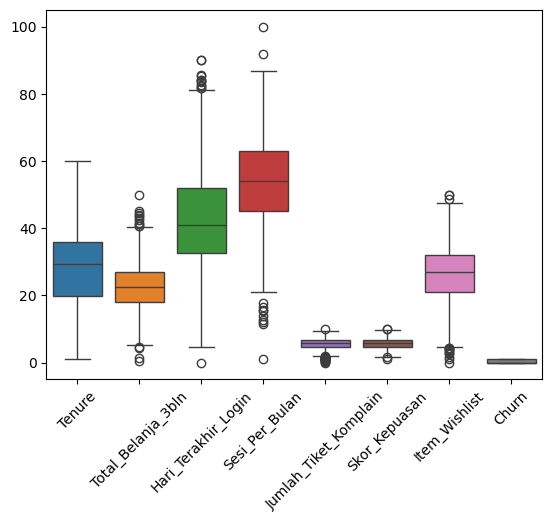

In [37]:
# Cek outlier
sns.boxplot(data=churn)
plt.xticks(rotation=45)
plt.show()


In [38]:
# Split Data
x = churn.drop(columns='Churn', axis=1)
y = churn['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42, 
                                                stratify=y)

In [39]:
# Define KFold Untuk Cross Validation
kfold = StratifiedKFold(n_splits=5, 
                        shuffle=True, 
                        random_state=42)

In [40]:
# PreProcessing

prepos = ColumnTransformer(transformers=[
    ('Scaler', RobustScaler(), ['Tenure', 'Total_Belanja_3bln', 'Hari_Terakhir_Login', 'Sesi_Per_Bulan',
                                'Jumlah_Tiket_Komplain', 'Skor_Kepuasan', 'Item_Wishlist']),
], remainder='passthrough')

prepos

ColumnTransformer(remainder='passthrough',
                  transformers=[('Scaler', RobustScaler(),
                                 ['Tenure', 'Total_Belanja_3bln',
                                  'Hari_Terakhir_Login', 'Sesi_Per_Bulan',
                                  'Jumlah_Tiket_Komplain', 'Skor_Kepuasan',
                                  'Item_Wishlist'])])

In [44]:
# Models Brenchmarking
dt = DecisionTreeClassifier(random_state=42, max_depth=None)
rf = RandomForestClassifier(random_state=42)
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
svm = SVC()
hard = VotingClassifier(
    estimators=[
        ('DT', DecisionTreeClassifier()),
        ('RF', RandomForestClassifier()),
        ('LogReg', LogisticRegression()),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC())
    ],
    voting='hard')

soft = VotingClassifier(
    estimators=[
        ('DT', DecisionTreeClassifier()),
        ('RF', RandomForestClassifier()),
        ('LogReg', LogisticRegression()),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC(probability=True))
    ],
    voting='soft')

stacking = StackingClassifier(
    estimators=[
        ('DT', DecisionTreeClassifier()),
        ('RF', RandomForestClassifier()),
        ('LogReg', LogisticRegression()),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC(probability=True))
    ],
    final_estimator=RandomForestClassifier(), cv=kfold
)
model = [dt, rf, logreg, knn, svm, hard, soft, stacking]
score = []
avg_Recall = []
std_Recall = []

for i in model :
    pipemodel = Pipeline([
        ('Preprocessing', prepos),
        ('Model', i)
    ])
    cv_score = cross_val_score(pipemodel, xtrain, ytrain, cv=kfold, scoring='recall')

    score.append(cv_score)
    avg_Recall.append(cv_score.mean())
    std_Recall.append(cv_score.std())

rangkuman = pd.DataFrame({
    'Model' : ['Decision Tree', 'Random Forest', 'LogReg', 'KNN', 'SVM', 'Hard Voting', 'Soft Voting', 'Stacking'],
    'Score AVG' : avg_Recall,
    'Score STD' : std_Recall
}).sort_values('Score AVG', ascending=False).reset_index(drop=True)
rangkuman[['Score AVG', 'Score STD']] = (rangkuman[['Score AVG', 'Score STD']] * 100).round(2).astype(str) + '%'
rangkuman

,Model,Score AVG,Score STD
0,KNN,90.65%,3.07%
1,Hard Voting,90.15%,2.86%
2,Random Forest,89.82%,3.08%
3,Stacking,89.82%,3.27%
4,Soft Voting,89.65%,2.97%
5,SVM,89.15%,3.03%
6,Decision Tree,86.31%,3.86%
7,LogReg,85.81%,5.06%


# Similiar Type: Tree-Based Model
- Bagging (Bootstrap Aggregating)
- Random Forest (turunan dari bagging)
- Boosting (Sequential Learning)

## Bootstrap
Bootstrap adalah teknik resampling yang digunakan untuk membuat beberapa dataset baru dari satu dataset asli. Proses ini dilakukan dengan metode *random sampling with replacement*, yaitu setiap data yang diambil dikembalikan lagi sehingga dapat terpilih kembali.

Ukuran setiap bootstrap sample tetap sama dengan ukuran dataset awal. Karena ada proses pengembalian, satu data dapat muncul lebih dari satu kali dan beberapa data lainnya mungkin tidak muncul sama sekali dalam satu sample.

---

### Cara Kerja

1. Ambil satu data dari dataset secara acak.
2. Simpan data tersebut, lalu kembalikan ke dataset.
3. Ulangi proses ini sampai jumlah data yang diambil sama dengan jumlah data asli.
4. Hasilnya disebut sebagai satu bootstrap sample.
5. Proses dapat diulang berkali-kali untuk menghasilkan beberapa sample.

---

### Contoh

Jika dataset asli memiliki ID dari 1 sampai 10, maka salah satu hasil bootstrap sample dapat terlihat seperti:

`3, 5, 6, 4, 9, 3, 5, 7, 7, 1`

Contoh lain masih bisa berbeda, misalnya:

`10, 9, 6, 7, 1, 2, 5, 4, 8, 9`

atau

`1, 3, 4, 2, 4, 7, 9, 10, 1, 3`

---

### Inti Konsep

Bootstrap digunakan untuk memperkirakan variasi atau kestabilan model dengan membuat beberapa versi dataset yang mirip dengan dataset asli. Teknik ini banyak digunakan dalam machine learning, terutama pada metode ensemble seperti Random Forest.


## Random Forest
Random Forest adalah algoritma ensemble learning yang menggabungkan banyak pohon keputusan (decision trees) untuk meningkatkan akurasi dan stabilitas prediksi. Setiap pohon dalam hutan dibangun menggunakan bootstrap sample dari dataset asli, dan pada setiap split, hanya subset acak dari fitur yang dipertimbangkan.

### Cara Kerja
1. Buat beberapa bootstrap sample dari dataset asli.
2. Untuk setiap sample, bangun pohon keputusan dengan memilih subset acak fitur pada setiap split.
3. Lakukan prediksi dengan menggabungkan hasil dari semua pohon (voting untuk klasifikasi, averaging untuk regresi).
4. Hasil gabungan memberikan prediksi akhir yang lebih akurat dan stabil dibandingkan satu pohon keputusan tunggal.

### Contoh
Jika memiliki dataset dengan 1000 sampel dan 20 fitur, Random Forest dapat membuat 100 pohon keputusan. Setiap pohon dilatih pada bootstrap sample yang berbeda dan hanya menggunakan subset acak dari 20 fitur pada setiap split. Prediksi akhir diambil dari hasil voting mayoritas dari semua pohon.
### Inti Konsep
Random Forest mengurangi overfitting dan meningkatkan generalisasi model dengan menggabungkan banyak pohon keputusan yang berbeda. Teknik ini efektif untuk menangani data dengan noise dan kompleksitas tinggi.

### Exercise 

In [46]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score

import warnings
warnings.filterwarnings('ignore')

# Load Data
churn = pd.read_csv('customer_churn.csv')
churn.head()

# Split Data
x = churn.drop(columns='Churn')
y = churn['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                stratify=y,
                                                random_state=42,
                                                test_size=0.2)

# Define KFold Untuk CrossVal
kfold = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)

# PreProcessing
prepos = ColumnTransformer(transformers=[
    ('Scaler', RobustScaler(), ['Tenure', 'Total_Belanja_3bln', 'Hari_Terakhir_Login', 'Sesi_Per_Bulan',
                                'Jumlah_Tiket_Komplain', 'Skor_Kepuasan', 'Item_Wishlist']),
], remainder='passthrough')

prepos

# Model benchmarking (Recall fokus pada kelas positif)
dt = DecisionTreeClassifier(random_state=42, max_depth=None)
rf = RandomForestClassifier(random_state=42)
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
svm = SVC()
bagging = BaggingClassifier(SVC(), n_estimators=100, random_state=42)

hard = VotingClassifier(estimators=[
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC())
], voting='hard')

soft = VotingClassifier(estimators=[
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC())
], voting='soft')

stacking = StackingClassifier(estimators=[
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC())
], final_estimator=RandomForestClassifier(), cv=kfold)

# Tambahkan bagging ke daftar model agar panjang list konsisten
model = [dt, rf, logreg, knn, svm, hard, soft, stacking, bagging]
score_mean = []
score_std = []

for m in model:
    pipe = Pipeline([
        ('Preprocesing', prepos),
        ('Model', m)
    ])

    cv_score = cross_val_score(pipe,
                               xtrain, ytrain,
                               cv=kfold,
                               scoring='recall')

    score_mean.append(round(cv_score.mean(), 5))
    score_std.append(round(cv_score.std(), 5))

rangkuman = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'LogReg', 'KNN', 'SVM', 'Hard Voting', 'Soft Voting', 'Stacking', 'Bagging (SVC)'],
    'Score AVG': score_mean,
    'Score STD': score_std
}).sort_values('Score AVG', ascending=False)

rangkuman[['Score AVG', 'Score STD']] = (rangkuman[['Score AVG', 'Score STD']] * 100).round(2).astype(str) + '%'

rangkuman

,Model,Score AVG,Score STD
3,KNN,90.65%,3.07%
7,Stacking,90.15%,3.22%
1,Random Forest,89.82%,3.08%
5,Hard Voting,89.65%,2.45%
8,Bagging (SVC),89.48%,3.4%
4,SVM,89.15%,3.03%
0,Decision Tree,86.31%,3.86%
2,LogReg,85.81%,5.06%
6,Soft Voting,nan%,nan%


## Boosting
Boosting adalah teknik ensemble learning yang menggabungkan beberapa model lemah (weak learners) secara berurutan untuk membentuk model yang kuat (strong learner). Setiap model baru fokus pada kesalahan yang dibuat oleh model sebelumnya, sehingga secara bertahap meningkatkan akurasi prediksi.

### Cara Kerja
1. Latih model pertama pada dataset asli.
2. Identifikasi sampel yang salah prediksi oleh model pertama.
3. Beri bobot lebih besar pada sampel yang salah prediksi.
4. Latih model kedua pada dataset dengan bobot yang diperbarui.
5. Ulangi proses ini untuk beberapa iterasi.
6. Gabungkan hasil semua model untuk prediksi akhir.

### Contoh
Misalkan menggunakan Decision Tree sebagai weak learner. Pada iterasi pertama, model dilatih pada dataset asli. Setelah itu, sampel yang salah prediksi diberi bobot lebih besar, dan model kedua dilatih pada dataset tersebut. Proses ini diulang beberapa kali, dan hasil akhir diambil dari gabungan semua model.

### Inti Konsep
Boosting meningkatkan performa model dengan fokus pada kesalahan prediksi secara bertahap. Teknik ini efektif untuk mengurangi bias dan meningkatkan akurasi, terutama pada dataset yang kompleks.  



### Exercise

In [52]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score

import warnings
warnings.filterwarnings('ignore')

# Load Data
churn = pd.read_csv('customer_churn.csv')
churn.head()

# Split Data
x = churn.drop(columns='Churn')
y = churn['Churn']

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                stratify=y,
                                                random_state=42,
                                                test_size=0.2)

# Define KFold Untuk CrossVal
kfold = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)

# PreProcessing
prepos = ColumnTransformer(transformers=[
    ('Scaler', RobustScaler(), ['Tenure', 'Total_Belanja_3bln', 'Hari_Terakhir_Login', 'Sesi_Per_Bulan',
                                'Jumlah_Tiket_Komplain', 'Skor_Kepuasan', 'Item_Wishlist']),
], remainder='passthrough')


# Model benchmarking (Recall fokus pada kelas positif)
dt = DecisionTreeClassifier(random_state=42, max_depth=None)
rf = RandomForestClassifier(random_state=42)
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
svm = SVC()
bagging = BaggingClassifier(SVC(), n_estimators=100, random_state=42)
adabost = AdaBoostClassifier(n_estimators=500, random_state=42)
gb = GradientBoostingClassifier(n_estimators=500, random_state=42)
xgb = XGBClassifier(n_estimators=500, random_state=42)
lgbm = LGBMClassifier(n_estimators=500, random_state=42, verbose=-1, silent=True)

hard = VotingClassifier(estimators=[
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC())
], voting='hard')

soft = VotingClassifier(estimators=[
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC())
], voting='soft')

stacking = StackingClassifier(estimators=[
    ('DT', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier()),
    ('LogReg', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC())
], final_estimator=RandomForestClassifier(), cv=kfold)

# Tambahkan bagging ke daftar model agar panjang list konsisten
model = [dt, rf, logreg, knn, svm, hard, soft, stacking, bagging, adabost, gb, xgb, lgbm]
score_mean = []
score_std = []

for m in model:
    pipe = Pipeline([
        ('Preprocesing', prepos),
        ('Model', m)
    ])

    cv_score = cross_val_score(pipe,
                               xtrain, ytrain,
                               cv=kfold,
                               scoring='recall')

    score_mean.append(round(cv_score.mean(), 5))
    score_std.append(round(cv_score.std(), 5))

rangkuman = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'LogReg', 'KNN', 'SVM', 'Hard Voting', 'Soft Voting', 'Stacking', 'Bagging (SVC)', 'AdaBoost', 'Gradient Boosting', 'XGBoost', 'LightGBM'],
    'Score AVG': score_mean,
    'Score STD': score_std
}).sort_values('Score AVG', ascending=False).reset_index(drop=True)

rangkuman[['Score AVG', 'Score STD']] = (rangkuman[['Score AVG', 'Score STD']] * 100).round(2).astype(str) + '%'

rangkuman

,Model,Score AVG,Score STD
0,Gradient Boosting,90.82%,3.8%
1,LightGBM,90.65%,3.1%
2,KNN,90.65%,3.07%
3,Stacking,90.31%,3.2%
4,AdaBoost,89.99%,4.71%
5,Random Forest,89.82%,3.08%
6,Hard Voting,89.82%,3.1%
7,Bagging (SVC),89.48%,3.4%
8,XGBoost,89.32%,3.99%
9,SVM,89.15%,3.03%


# Sovling Case

In [83]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Case: Auto-Screening Kandidat Lamaran Kerja

Sebuah perusahaan besar menerima ribuan CV per bulan. Mereka membuat sistem auto-screening untuk membantu recruiter:

**Target:**
- `auto_reject = Yes` → sistem langsung menolak kandidat (tanpa dicek manusia)
- `auto_reject = No` → kandidat diteruskan ke recruiter untuk review manual

**Dataset:** 10 Features + 1 Target
- `candidate_id`, `education_level`, `years_experience`, `coding_test_score`, `english_test_score`, `num_relevant_skills`, `has_management_experience`, `previous_company_tier`, `expected_salary`, `preferred_work_type`, `auto_reject`

In [84]:
# Data
candidate = pd.read_csv('candidate_screening_3000.csv')
candidate.head()

,candidate_id,education_level,years_experience,coding_test_score,english_test_score,num_relevant_skills,has_management_experience,previous_company_tier,expected_salary,preferred_work_type,auto_reject
0,C0001,SMA,15,36,0.0,6,Yes,NaN,4893760,Remote,No
1,C0002,s1,2,3,46.0,7,No,NaN,9460502,hybrid,No
2,C0003,s2,11,48,NaN,1,No,NaN,18515490,onsite,No
3,C0004,Diploma,15,22,56.0,7,No,NaN,6595903,Onsite,No
4,C0005,s2,12,76,18.0,10,Yes,NaN,24545448,hybrid,No


In [85]:
# Cek Proporsi Data
candidate['auto_reject'].value_counts(normalize=True).mul(100).round(2)

auto_reject
No     82.37
Yes    17.63
Name: proportion, dtype: float64

In [86]:
# Data Cleaning
# Standarisasi education_level
education_map = {
    's1': 'Bachelor', 'S1': 'Bachelor', 'bachelor': 'Bachelor', 'Bachelor': 'Bachelor',
    's2': 'Master', 'S2': 'Master', 'Master': 'Master',
    'Diploma': 'Diploma', 'SMA': 'SMA'
}
candidate['education_level'] = candidate['education_level'].map(education_map)

# Standarisasi preferred_work_type (ke lowercase)
candidate['preferred_work_type'] = candidate['preferred_work_type'].str.lower()

# Atasi Missing Values
candidate['english_test_score'].fillna(0, inplace=True) 
candidate['previous_company_tier'].fillna('Unknown', inplace=True)  

In [87]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical
le = LabelEncoder()
candidate['education_level'] = le.fit_transform(candidate['education_level'])
candidate['has_management_experience'] = le.fit_transform(candidate['has_management_experience'])
candidate['previous_company_tier'] = le.fit_transform(candidate['previous_company_tier'])
candidate['preferred_work_type'] = le.fit_transform(candidate['preferred_work_type'])

# Encode target (Yes/No -> 1/0)
candidate['auto_reject'] = candidate['auto_reject'].map({'No': 0, 'Yes': 1})

# Split data
x = candidate.drop(columns=['candidate_id', 'auto_reject'])
y = candidate['auto_reject']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
# Basic Models
rf = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=100)
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Penalized Models
rf1 = RandomForestClassifier(random_state=42, max_depth=10, n_estimators=100, class_weight='balanced')
dt1 = DecisionTreeClassifier(random_state=42, max_depth=10, class_weight='balanced')
logreg1 = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

model = [rf, rf1, dt, dt1, logreg, logreg1]
namaModel = ['RandomForest', 'RandomForest (P)', 'DecisionTree', 'DecisionTree (P)', 'LogisticRegression', 'LogisticRegression (P)']

**Definisi Metriks**
- FP = Prediksi Auto-Reject (Yes), tapi ternyata kandidat bagus (No) → kehilangan kandidat potensial
- FN = Prediksi Lolos (No), tapi ternyata kandidat buruk (Yes) → recruiter buang waktu review kandidat buruk

Reduce FP → Precision (kita harus yakin kalau auto-reject memang benar buruk)

In [89]:
# Benchmarking Models
score = []
avg_Recall = []
std_Recall = []

for i in model:
    cv = cross_val_score(i, xtrain, ytrain, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring='recall')
    
    score.append(cv)
    avg_Recall.append(cv.mean())
    std_Recall.append(cv.std())

hasil = pd.DataFrame({
    'Model': namaModel,
    'AVG Recall Score': avg_Recall,
    'STD Recall Score': std_Recall
}).sort_values('AVG Recall Score', ascending=False).reset_index(drop=True)

hasil[['AVG Recall Score', 'STD Recall Score']] = (hasil[['AVG Recall Score', 'STD Recall Score']] * 100).round(2).astype(str) + '%'
hasil

,Model,AVG Recall Score,STD Recall Score
0,LogisticRegression (P),49.18%,4.03%
1,DecisionTree (P),43.97%,7.43%
2,DecisionTree,6.62%,2.08%
3,RandomForest (P),2.37%,1.07%
4,RandomForest,0.24%,0.47%
5,LogisticRegression,0.0%,0.0%
